In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel("../input/proyeksi/proyeksi-data-penduduk-uas-2-b.xlsx")

print(f"head: \n{data.head(5)}\n")
print(f"Tail: \n {data.tail()} \n")
print(f"Describe data: \n{data.describe()}\n")
print(f"Info: \n{data.info()}\n")

head: 
         Provinsi     2010     2015     2020     2025     2030     2035
0            Aceh   4523.1   5002.0   5459.9   5870.0   6227.6   6541.4
1  Sumatera Utara  13028.7  13937.8  14703.5  15311.2  15763.7  16073.4
2  Sumatera Barat   4865.3   5196.3   5498.8   5757.8   5968.3   6130.4
3            Riau   5574.9   6344.4   7128.3   7898.5   8643.3   9363.0
4           Jambi   3107.6   3402.1   3677.9   3926.6   4142.3   4322.9

Tail: 
        Provinsi      2010      2015      2020      2025      2030      2035
36  Kep. Maluku    2585.2    2848.8    3110.7    3363.7    3603.6    3831.4
37  Papua Barat     765.3     871.5     981.8    1092.2    1200.1    1305.0
38        Papua    2857.0    3149.4    3435.4    3701.7    3939.4    4144.6
39  Pulau Papua    3622.3    4020.9    4417.2    4793.9    5139.5    5449.6
40    INDONESIA  238518.8  255461.7  271066.4  284829.0  296405.1  305652.4 

Describe data: 
                2010           2015           2020           2025  \
count    

In [3]:
data_x = data.iloc[:, 1:7]
data_x.head()

,2010,2015,2020,2025,2030,2035
0,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4
1,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4
2,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4
3,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0
4,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9


In [4]:
scr=[]

for i in range (1, 35):
    score = KMeans(n_clusters=i).fit(data_x).score(data_x)
    print(score)
    scr.append(score)

-568061426123.0723
-87664739300.13742
-43080434330.41743
-7443842056.731574
-3624564321.821322
-1557793494.646322
-892651720.9751997
-609247646.4552001
-353389383.1132564
-224210636.42158976
-165034604.53075638
-114354078.36603346
-83652235.1424791
-56332766.30277779
-42882215.89544895
-30766868.185
-22098185.299302075
-14729037.036333334
-10030714.798500003
-8492344.200500004
-6721214.2005
-5707214.142999999
-4329864.517999998
-3684167.8029999994
-2990566.261666667
-2321044.9216666673
-1902791.9933333336
-1538240.89
-1172488.78
-950477.4650000003
-690765.5850000003
-496993.8600000003
-720128.1700000011
-541974.4700000016


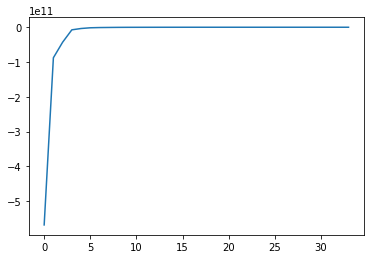

In [5]:
plt.plot(scr)

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_x)

KMeans(n_clusters=5)

In [7]:
data_x["Cluster"] = kmeans.labels_
data_x

,2010,2015,2020,2025,2030,2035,Cluster
0,4523.1,5002.0,5459.9,5870.0,6227.6,6541.4,3
1,13028.7,13937.8,14703.5,15311.2,15763.7,16073.4,0
2,4865.3,5196.3,5498.8,5757.8,5968.3,6130.4,3
3,5574.9,6344.4,7128.3,7898.5,8643.3,9363.0,3
4,3107.6,3402.1,3677.9,3926.6,4142.3,4322.9,3
5,7481.6,8052.3,8567.9,9000.4,9345.2,9610.7,3
6,1722.1,1874.9,2019.8,2150.5,2264.3,2360.6,3
7,7634.0,8117.3,8521.2,8824.6,9026.2,9136.1,3
8,1230.2,1372.8,1517.6,1657.5,1788.9,1911.0,3
9,1692.8,1973.0,2242.2,2501.5,2768.5,3050.5,3


(array([ 6.,  0.,  1.,  0.,  0.,  1.,  0., 29.,  0.,  4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

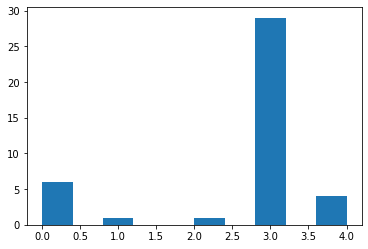

In [8]:
plt.hist(data_x["Cluster"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

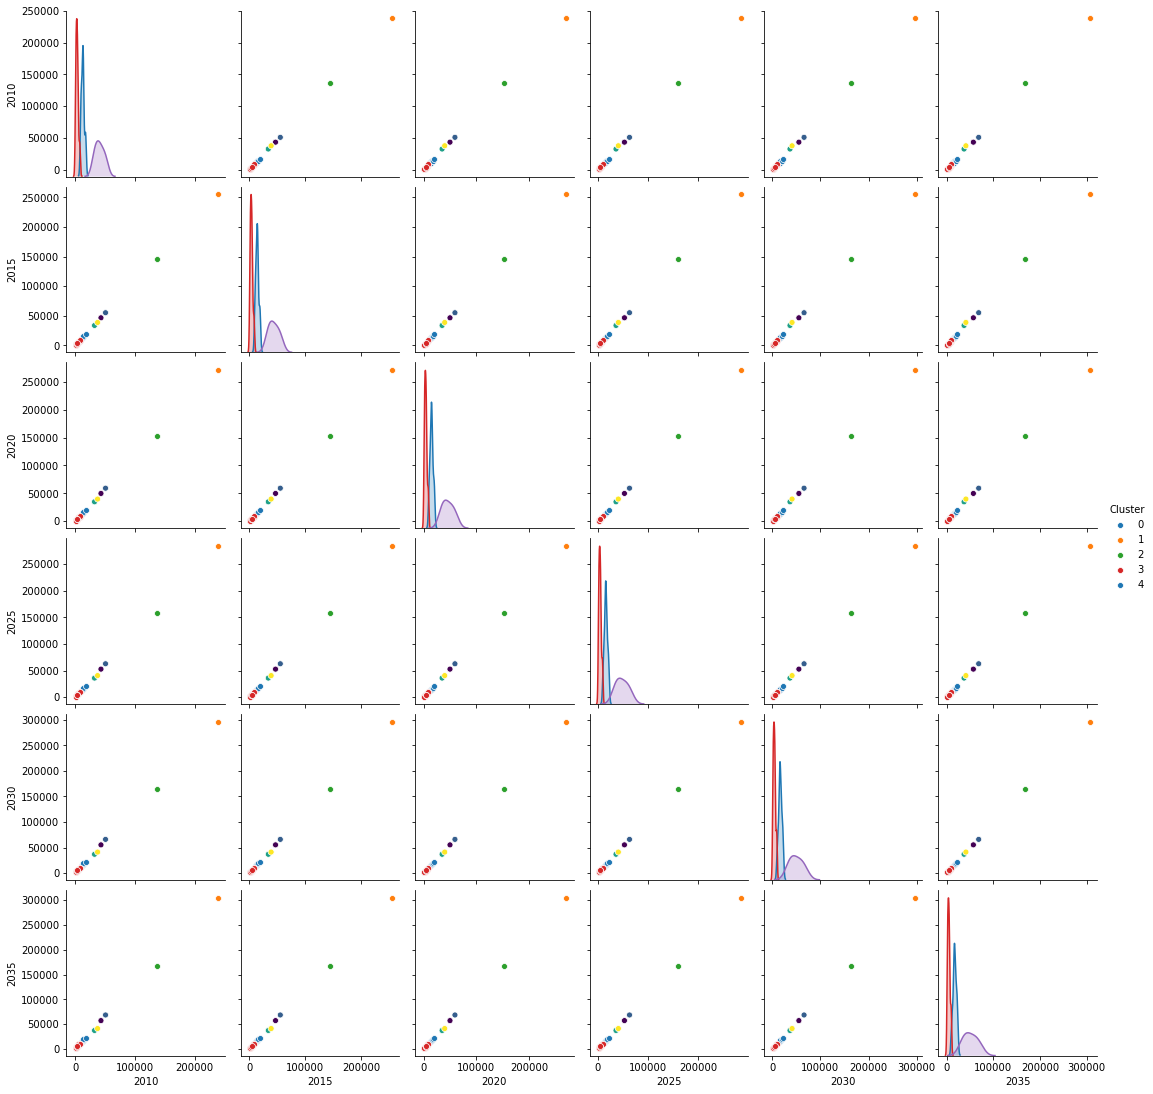

In [9]:
sns.pairplot(data_x, hue="Cluster")